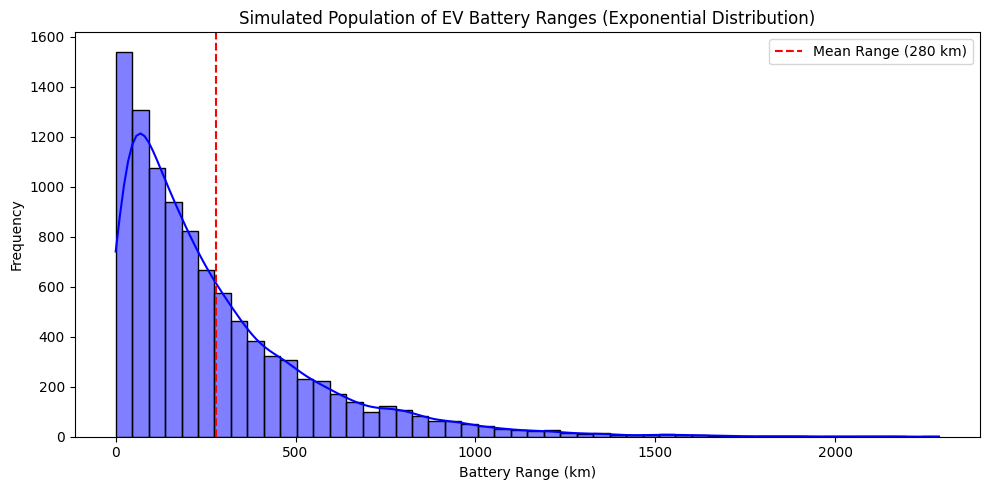

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Simulate a population of 10000 EV battery ranges (in km), using exponential distribution
population_size = 10000
battery_range_population = np.random.exponential(scale=280, size=population_size)  # mean ~280 km

# Plot the population distribution
plt.figure(figsize=(10, 5))
sns.histplot(battery_range_population, bins=50, kde=True, color='blue')
plt.axvline(x=280, color='red', linestyle='--', label='Mean Range (280 km)')
plt.title('Simulated Population of EV Battery Ranges (Exponential Distribution)')
plt.xlabel('Battery Range (km)')
plt.ylabel('Frequency')

plt.legend()
plt.tight_layout()
plt.show()

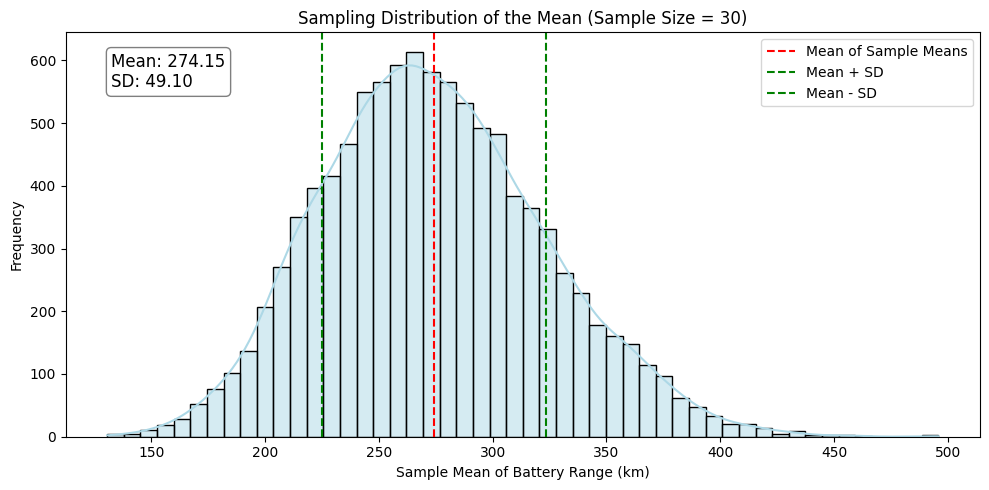

In [11]:
sample_means = []
for _ in range(10000):
    sample = np.random.choice(battery_range_population, size=30, replace=True)
    sample_means.append(np.mean(sample))

plt.figure(figsize=(10, 5))
sns.histplot(sample_means, bins=50, kde=True, color='lightblue')
plt.axvline(x=np.mean(sample_means), color='red', linestyle='--', label='Mean of Sample Means')
plt.axvline(x=np.mean(sample_means) + np.std(sample_means), color='green', linestyle='--', label='Mean + SD')
plt.axvline(x=np.mean(sample_means) - np.std(sample_means), color='green', linestyle='--', label='Mean - SD')
plt.legend()
plt.title('Sampling Distribution of the Mean (Sample Size = 30)')
plt.xlabel('Sample Mean of Battery Range (km)')
plt.ylabel('Frequency')

# Add a text box with mean and standard deviation values
textstr = f"Mean: {np.mean(sample_means):.2f}\nSD: {np.std(sample_means):.2f}"
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

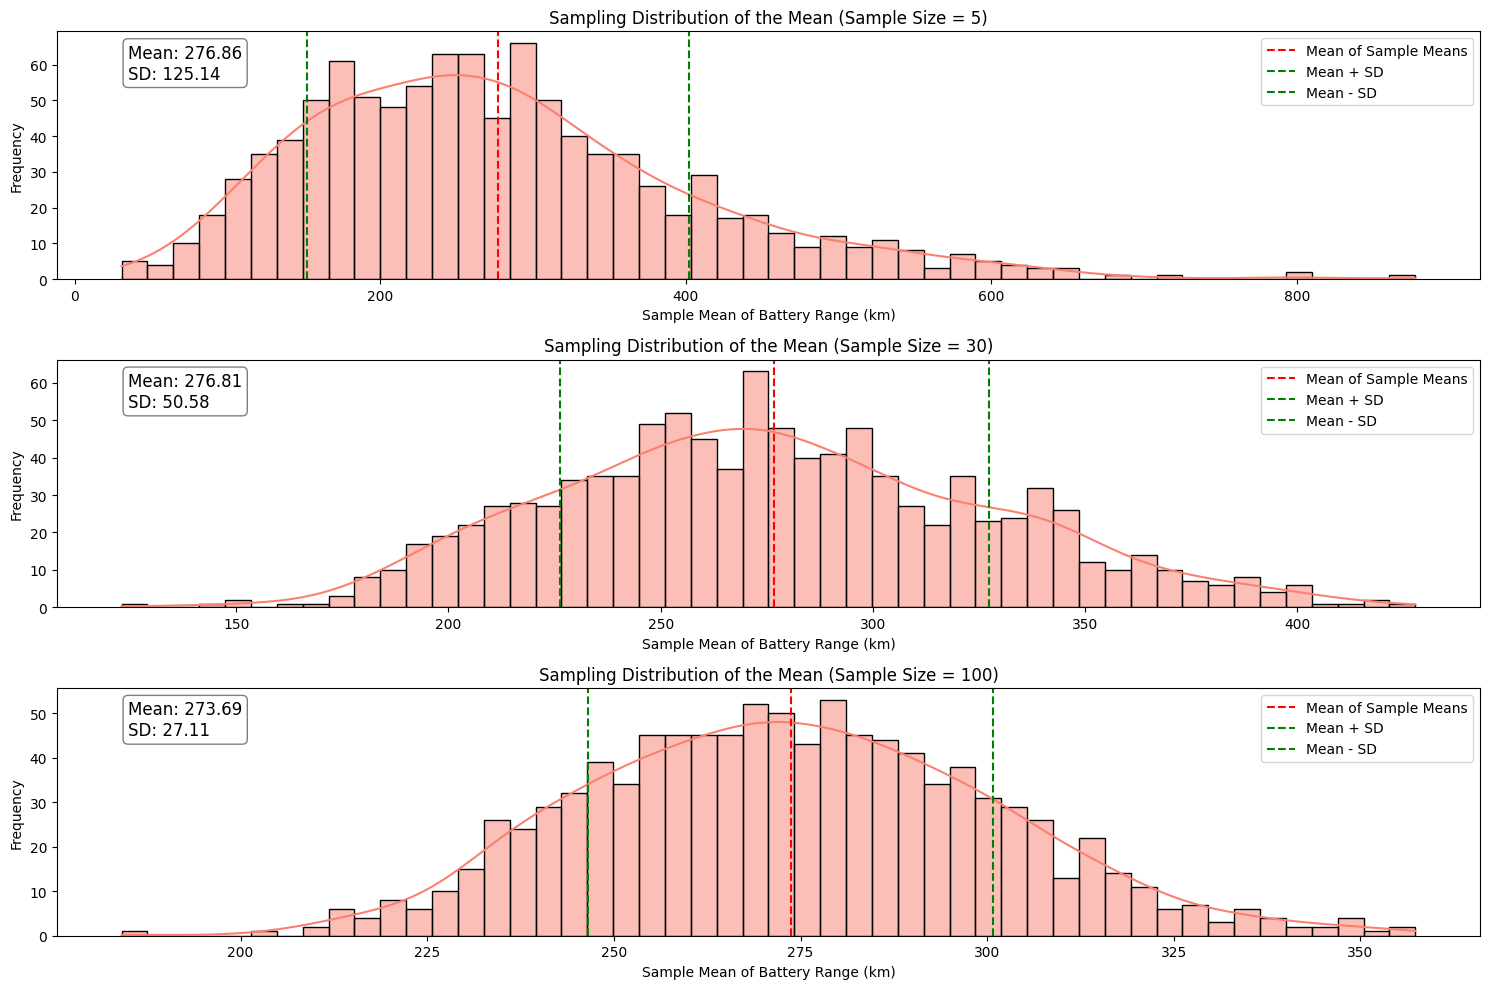

In [13]:
# Function to simulate sampling distribution of sample means
def simulate_sample_means(population, sample_size, num_samples=1000):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

# Define sample sizes
sample_sizes = [5, 30, 100]

# Plot sampling distributions for different sample sizes
plt.figure(figsize=(15, 10))

for i, n in enumerate(sample_sizes):
    sample_means = simulate_sample_means(battery_range_population, sample_size=n)
    
    plt.subplot(3, 1, i+1)
    sns.histplot(sample_means, bins=50, kde=True, color='salmon')
    plt.axvline(x=np.mean(sample_means), color='red', linestyle='--', label='Mean of Sample Means')
    # plot the standard deviation of the sample means
    plt.axvline(x=np.mean(sample_means) + np.std(sample_means), color='green', linestyle='--', label='Mean + SD')
    plt.axvline(x=np.mean(sample_means) - np.std(sample_means), color='green', linestyle='--', label='Mean - SD')
    plt.legend()      
    plt.title(f'Sampling Distribution of the Mean (Sample Size = {n})')
    plt.xlabel('Sample Mean of Battery Range (km)')
    plt.ylabel('Frequency')

    # Add a text box with mean and standard deviation values
    textstr = f"Mean: {np.mean(sample_means):.2f}\nSD: {np.std(sample_means):.2f}"
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()